Dataset Shape: (1000, 9)
Train shape: (800, 10)
Test shape: (200, 10)

Linear Regression
R2 Score: 0.9733
RMSE: 26739.44
MAE: 21018.89

Random Forest
R2 Score: 0.8971
RMSE: 52447.61
MAE: 41756.25


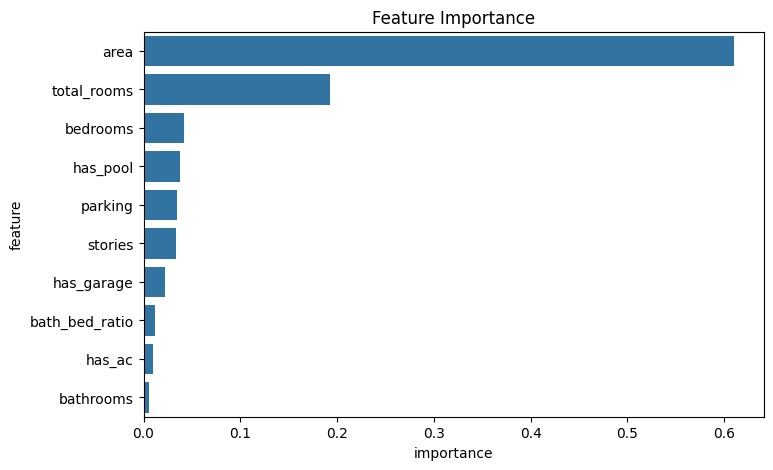

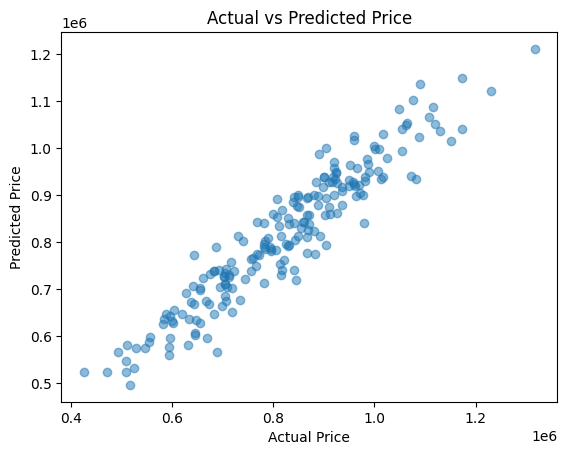

✅ Model and preprocessing files saved successfully!


In [ ]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("house_data.csv")

print("Dataset Shape:", df.shape)
df.head()


categorical_cols = ['has_pool', 'has_garage', 'has_ac']

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

df['price_per_sqft'] = df['price'] / df['area']
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['bath_bed_ratio'] = df['bathrooms'] / (df['bedrooms'] + 1)

df.head()

X = df.drop(['price', 'price_per_sqft'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42
    )
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)

    results[name] = {
        "R2": r2,
        "RMSE": rmse,
        "MAE": mae
    }

    print(f"\n{name}")
    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

results_df = pd.DataFrame(results).T
results_df

best_model = models["Random Forest"]

feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": best_model.feature_importances_
}).sort_values(by="importance", ascending=False)

feature_importance

plt.figure(figsize=(8,5))
sns.barplot(data=feature_importance, x="importance", y="feature")
plt.title("Feature Importance")
plt.show()

y_pred = best_model.predict(X_test_scaled)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()


with open("../Backend_API/model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("../Backend_API/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("../Backend_API/label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)


with open("../Backend_API/feature_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

print("✅ Model and preprocessing files saved successfully!")

